In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [12]:
df=pd.read_csv("test_output_single_mass_regular.dat")

In [13]:
df["mass"] = (df["mass"]-170.0)/(5.0)

In [14]:
df_175 = df.loc[df['mass'] == 1.0]
df_170 = df.loc[df['mass'] == 0.0]

In [15]:
i_sp = np.linspace(0.0,1.0,1001)
i_zero_170 = np.linspace(0.0,0.0,1001)
i_zero_175 = np.linspace(0.0,0.0,1001)

In [16]:
def neg_ln_bern(a,b,c,d,x):
    r0 = a*np.power((1.0-x),3.0)
    r1 = b*3.0*x*np.power(1.0-x,2.0)
    r2 = c*3.0*np.power(x,2.0)*(1.0-x)
    r3 = d*np.power(x,3.0)
    return (-np.log(r0+r1+r2+r3))
bern_vec = np.vectorize(neg_ln_bern)

In [17]:
for index, row in df_170.iterrows():
    i_zero_170 = i_zero_170 + bern_vec(row['out_a'],row['out_b'],row['out_c'],row['out_d'],i_sp)

In [18]:
for index, row in df_175.iterrows():
    i_zero_175 = i_zero_175 + bern_vec(row['out_a'],row['out_b'],row['out_c'],row['out_d'],i_sp)

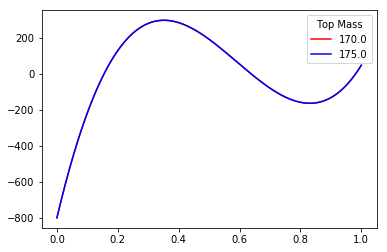

In [19]:
plt.plot(i_sp,i_zero_170,color='r',label='170.0')
plt.plot(i_sp,i_zero_175,color='b',label='175.0')
plt.legend(frameon=True,facecolor="white",title="Top Mass")
plt.savefig("mass_histo/log_likelihood_single_mass_regular.pdf")
plt.show()